In [1]:
import pandas as pd
path = "sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [3]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [5]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [6]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Visualization / EDA

In [8]:
print(df.columns)
import matplotlib.pyplot as plt
import seaborn as sns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')


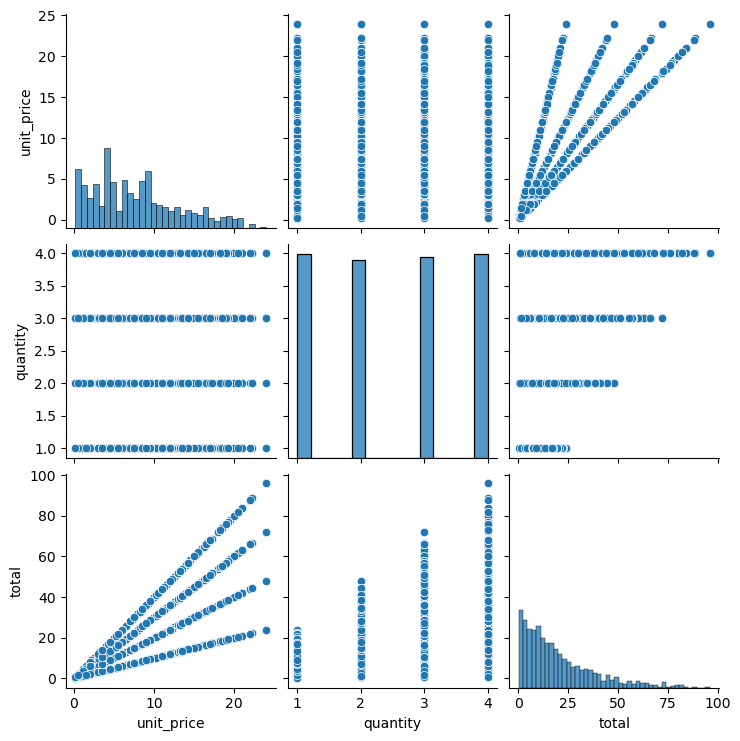

In [9]:
sns.pairplot(df)

In [10]:
df["product_id"].value_counts()

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64

Text(0.5, 1.0, 'Bar Plot of Category Counts')

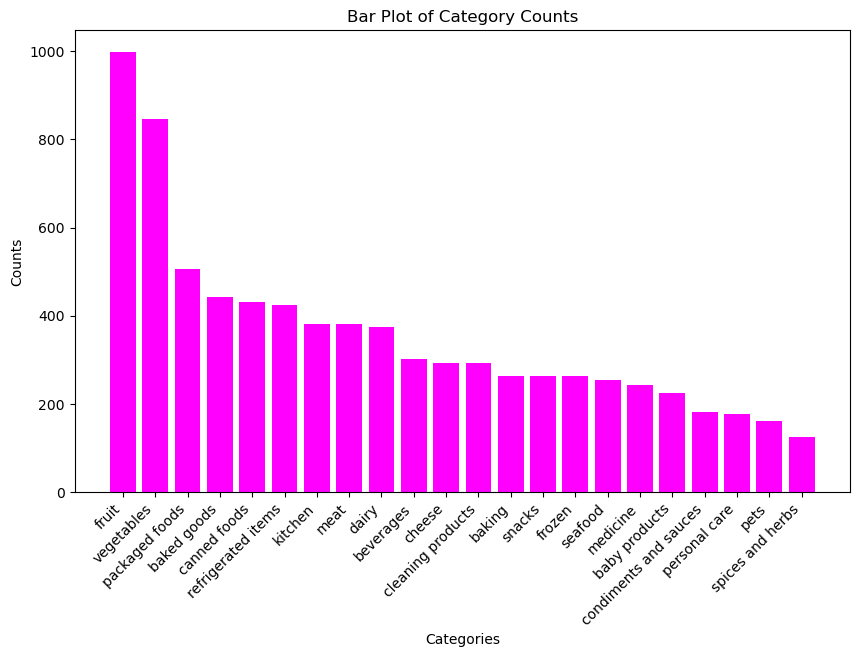

In [11]:
cat_count = df["category"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(cat_count.index , cat_count.values,color = "magenta")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Bar Plot of Category Counts")

Text(0.5, 1.0, 'Customer type count')

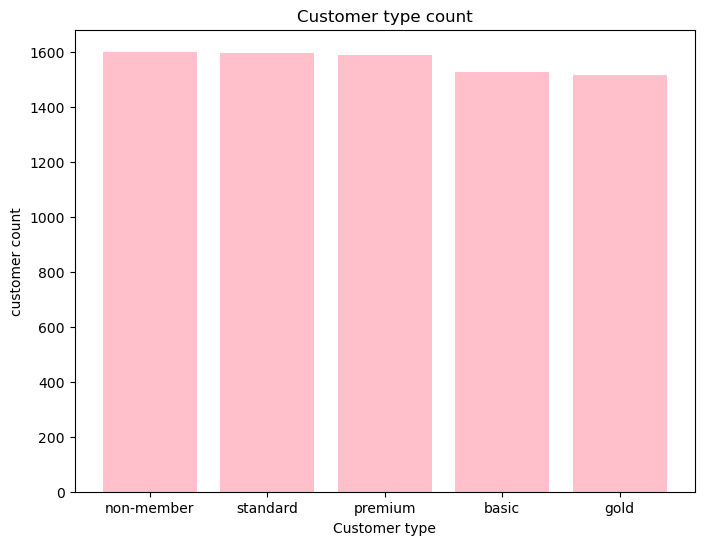

In [12]:
customer_type = df["customer_type"].value_counts()
plt.figure(figsize=(8,6))
plt.bar(customer_type.index , customer_type.values, color = "pink")
plt.xlabel("Customer type")
plt.ylabel("customer count")
plt.title("Customer type count")

Text(0.5, 1.0, 'Payment type and count')

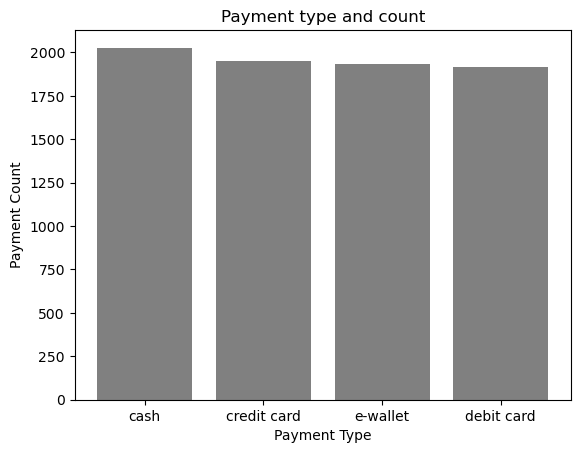

In [13]:
pay_type = df["payment_type"].value_counts()
plt.bar(pay_type.index , pay_type.values, color = "Grey")
plt.xlabel("Payment Type")
plt.ylabel("Payment Count")
plt.title("Payment type and count")

In [14]:
total_sales = df.groupby(["category"],as_index = False).sum()

C:\Users\Owais Akram\AppData\Local\Temp\ipykernel_16260\3206681863.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sales = df.groupby(["category"],as_index = False).sum()


Text(0.5, 1.0, 'Total sales per category')

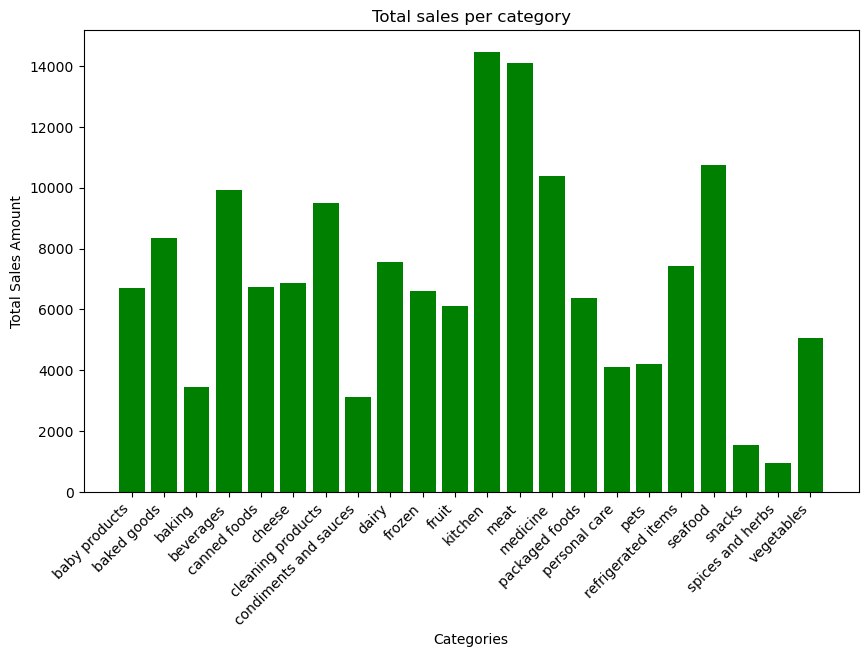

In [15]:
plt.figure(figsize = (10,6))
plt.bar(total_sales["category"],total_sales["total"], color = "Green")
plt.xticks(rotation = 45,ha="right")
plt.xlabel("Categories")
plt.ylabel("Total Sales Amount")
plt.title("Total sales per category")

In [16]:
df["hour"]=df["timestamp"].dt.hour
df["Day of Week"]=df["timestamp"].dt.day_name()

In [17]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour,Day of Week
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9,Wednesday
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10,Sunday
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17,Friday
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17,Wednesday
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14,Saturday


In [18]:
busiest_hour  =df["hour"].value_counts().sort_index()

In [20]:
busiest_day = df["Day of Week"].value_counts().sort_index()

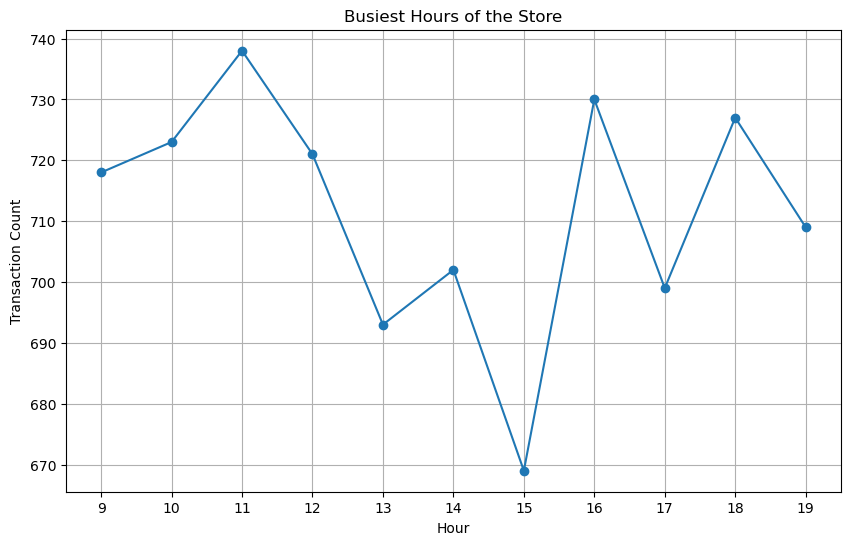

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(busiest_hour.index, busiest_hour.values, marker='o')
plt.xlabel("Hour")
plt.ylabel('Transaction Count')
plt.title('Busiest Hours of the Store')
plt.xticks(busiest_hour.index)
plt.grid(True)
plt.show()

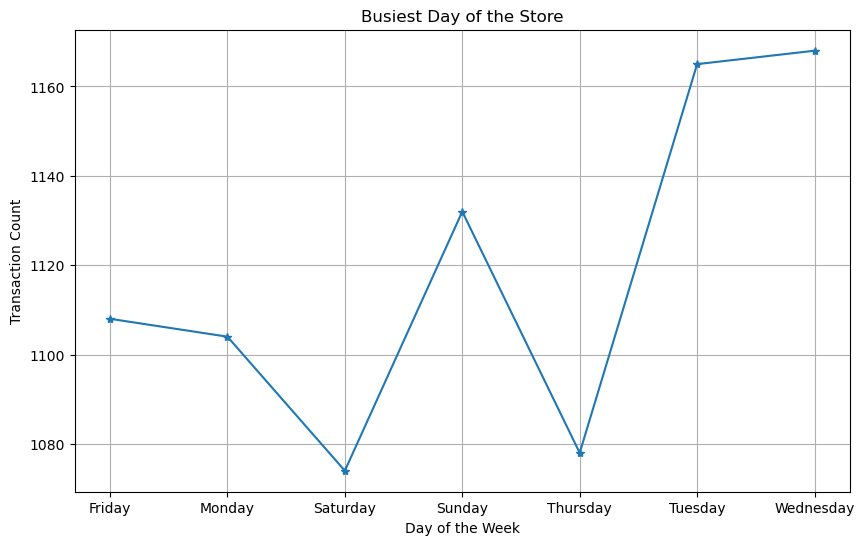

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(busiest_day.index, busiest_day.values, marker='*')
plt.xlabel("Day of the Week")
plt.ylabel('Transaction Count')
plt.title('Busiest Day of the Store')
plt.xticks(busiest_day.index)
plt.grid(True)
plt.show()

# Adding Different Data Tables

In [23]:
path = "sensor_stock_levels.csv"
stocklevel = pd.read_csv(path)
stocklevel.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stocklevel.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [24]:
path = "sensor_storage_temperature.csv"
storagetemp = pd.read_csv(path)
storagetemp.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
storagetemp.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [25]:
stocklevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [26]:
stocklevel.isnull().sum()

id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

In [27]:
stocklevel.duplicated().sum()

0

In [28]:
storagetemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.1+ KB


In [29]:
storagetemp.isnull().sum()

id             0
timestamp      0
temperature    0
dtype: int64

# Converting Timestamp Datatype to Datetime format

In [30]:
stocklevel["timestamp"] = pd.to_datetime(stocklevel["timestamp"])
storagetemp["timestamp"]= pd.to_datetime(storagetemp["timestamp"])

In [31]:
stocklevel.describe()

,estimated_stock_pct
count,15000.000000
mean,0.502735
std,0.286842
min,0.010000
25%,0.260000
50%,0.500000
75%,0.750000
max,1.000000


In [32]:
storagetemp.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


# Merging Data

Currently we have three data sets df, stocklevel and storagetemp all these datasets will have to be merged in order for creating model. "Business Problem: Can we accurately predict the stock levels of products, based on sales data and sensor data, on an hourly basis in order to more intelligently procure products from our suppliers." We will transform timestamp column so that it containes date and time (hour only) not minutes. then we will merge



In [33]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime("%Y-%m-%d %H:00:00") for i in new_ts]
  new_ts = [datetime.strptime(i, "%Y-%m-%d %H:00:00") for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [34]:
df = convert_timestamp_to_hourly(df, "timestamp")
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour,Day of Week
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9,Wednesday
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10,Sunday
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17,Friday
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17,Wednesday
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14,Saturday


In [35]:
stocklevel = convert_timestamp_to_hourly(stocklevel, "timestamp")
stocklevel.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [36]:
storagetemp = convert_timestamp_to_hourly(storagetemp,"timestamp")
storagetemp.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [37]:
stock_agg = stocklevel.groupby(["timestamp", "product_id"]).agg({"estimated_stock_pct": "mean"}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [38]:
sales_agg = df.groupby(["timestamp", "product_id"]).agg({"quantity": "sum"}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [39]:
temp_agg = storagetemp.groupby(["timestamp"]).agg({"temperature": "mean"}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


This gives us the average temperature of the storage facility where the produce is stored in the warehouse by unique hours during the week. Now, we are ready to merge our data. We will use the stock_agg table as our base table, and we will merge our other 2 tables onto this.

In [40]:
merged_df = stock_agg.merge(sales_agg, on=["timestamp", "product_id"], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [41]:
merged_dff = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_dff.head()


,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [42]:
merged_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

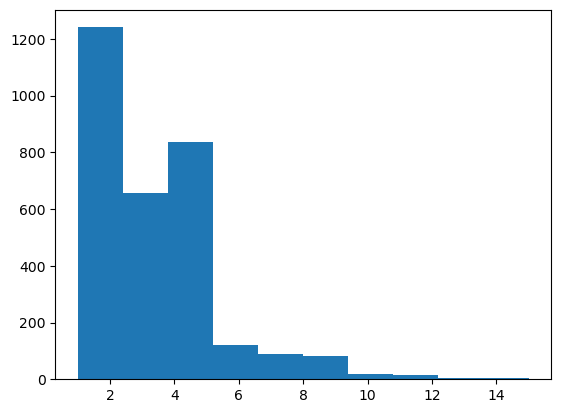

In [44]:
plt.hist(merged_dff["quantity"])
plt.show

In [45]:
merged_dff["quantity"] = merged_df["quantity"].fillna(0)
merged_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


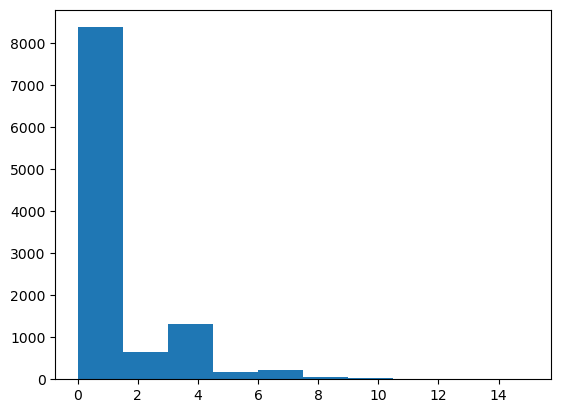

In [46]:
plt.hist(merged_dff["quantity"])
plt.show()

In [47]:
product_categories = df[["product_id", "category"]]
product_categories = product_categories.drop_duplicates()

product_price = df[["product_id", "unit_price"]]
product_price = product_price.drop_duplicates()

In [48]:
merged_dff = merged_dff.merge(product_categories, on="product_id", how="left")
merged_dff = merged_dff.merge(product_price, on="product_id", how="left")
merged_dff.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [49]:
merged_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


Now we have a single merged df, which contains all the relevant information for model prediction

# Feature Engineering

In [50]:
merged_dff["Day of Month"] = merged_df["timestamp"].dt.day
merged_dff["Day of Week"] = merged_df["timestamp"].dt.dayofweek
merged_dff["Hour"] = merged_df["timestamp"].dt.hour
merged_dff.drop(columns=["timestamp"], inplace=True)
merged_dff.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,Day of Month,Day of Week,Hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [51]:
merged_dff.corr()

C:\Users\Owais Akram\AppData\Local\Temp\ipykernel_16260\1387488362.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_dff.corr()


,estimated_stock_pct,quantity,temperature,unit_price,Day of Month,Day of Week,Hour
estimated_stock_pct,1.000000,0.012929,0.007955,-0.024479,0.001786,-0.013880,0.012894
quantity,0.012929,1.000000,-0.017771,-0.108101,-0.005037,-0.005017,0.010141
temperature,0.007955,-0.017771,1.000000,0.002874,-0.039034,0.028880,0.054904
unit_price,-0.024479,-0.108101,0.002874,1.000000,-0.002841,-0.003186,-0.004508
Day of Month,0.001786,-0.005037,-0.039034,-0.002841,1.000000,0.234703,0.008650
Day of Week,-0.013880,-0.005017,0.028880,-0.003186,0.234703,1.000000,-0.007717
Hour,0.012894,0.010141,0.054904,-0.004508,0.008650,-0.007717,1.000000


In [52]:
dfn = pd.get_dummies(merged_dff,columns = ["category"])
dfn.head(10)
            

,product_id,estimated_stock_pct,quantity,temperature,unit_price,Day of Month,Day of Week,Hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0998699f-2fec-454e-b8b0-4f701947fef6,0.10,0.0,-0.02885,15.99,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0cb046e3-a86b-47ae-9751-3b0f9c596f99,0.83,0.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0cc2986e-934c-447e-8f7b-a57b2ceb8693,0.67,0.0,-0.02885,16.19,1,1,9,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0ddc2379-adba-4fb0-aa97-19fcafc738a1,0.35,3.0,-0.02885,3.99,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,0.0,-0.02885,4.99,1,1,9,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   Day of Month                    10845 non-null  int64  
 6   Day of Week                     10845 non-null  int64  
 7   Hour                            10845 non-null  int64  
 8   category_baby products          10845 non-null  uint8  
 9   category_baked goods            10845 non-null  uint8  
 10  category_baking                 10845 non-null  uint8  
 11  category_beverages              10845 non-null  uint8  
 12  category_canned foods           

Looking at the latest table, we only have 1 remaining column which is not numeric. This is the product_id. Since each row represents a unique combination of product_id and timestamp by hour, and the product_id is simply an ID column, it will add no value by including it in the predictive model. Hence, we shall remove it from the modeling process. This feature engineering was by no means exhaustive, but was enough to give you an example of the process followed when engineering the features of a dataset. In reality, this is an iterative task. Once you've built a model, you may have to revist feature engineering in order to create new features to boost the predictive power of a machine learning model.

# Modeling

In [54]:
X = dfn.drop(columns=["estimated_stock_pct","product_id"])
y = dfn["estimated_stock_pct"]
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
K = 10
split = 0.70

In [57]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  r2 = r2_score(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")
print(r2)

Fold 1: MAE = 0.236
Fold 2: MAE = 0.236
Fold 3: MAE = 0.236
Fold 4: MAE = 0.236
Fold 5: MAE = 0.236
Fold 6: MAE = 0.236
Fold 7: MAE = 0.236
Fold 8: MAE = 0.236
Fold 9: MAE = 0.235
Fold 10: MAE = 0.236
Average MAE: 0.24
-0.16230370463627608


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr = SVR(kernel='poly')  # You can try different kernels like 'rbf', 'poly', etc.

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.08
R-squared Score: -0.09


The low MSE of 0.08 is a positive sign, indicating that our model's predictions are relatively accurate in terms of squared differences.

However, the negative R-squared score of -0.09 indicates that our SVR model is not explaining the variance in the target variable and is performing poorly overall.

It's important to further analyze and potentially refine our model. we might want to investigate factors such as hyperparameter tuning, different kernel functions, feature engineering, and data quality to improve the model's performance and achieve a positive R-squared score closer to 1. Approximately the same result can be seen while using random forest reggressor using K Folds

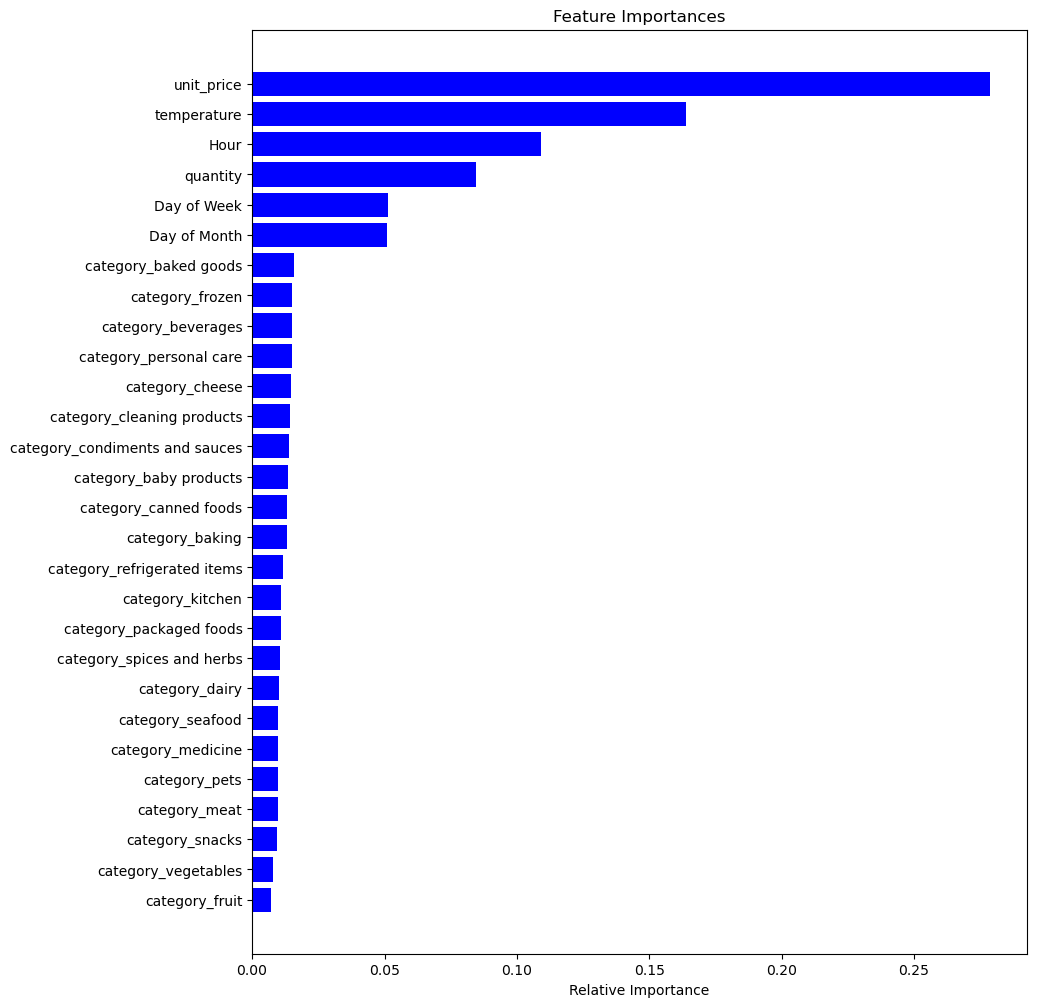

In [59]:
import numpy as np
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()